# Test notebook

This notebook can be used to test a besca version to ensure that everything is still functional.

It shows some analysis results presentations and should be checked before a release.

In [33]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

In [34]:
import scanpy.api as sc
import besca as bc
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# testing of helper functions

In [35]:
adata = bc.datasets.pbmc3k_processed()
adata_raw = bc.get_raw(adata)

# testing of count functions

In [36]:
adata = bc.datasets.pbmc_storage_processed()

In [37]:
adata

AnnData object with n_obs × n_vars = 27901 × 1433 
    obs: 'CELL', 'CONDITION', 'experiment', 'sample_type', 'storage_condition', 'donor', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'louvain', 'celltype'
    var: 'ENSEMBL', 'SYMBOL', 'n_cells', 'total_counts', 'frac_reads', 'mean', 'mean_log1p', 'coeffvar', 'coeffvar_log1p'
    uns: 'donor_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'storage_condition_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [38]:
bc.tl.count_occurance_subset(adata=adata, count_variable='louvain', subset_variable='donor')

Donor_3A  Donor_1  Donor_2
0       1810     1412     1018
1       1921     1345      901
10       119      121      137
11        70      120       46
12        93       31       22
2       1382     1499     1003
3       1284      655     1421
4       1613      989      693
5       1539      697      792
6        650      397      545
7        330      668      569
8        380      334      730
9        120      254      191

In [39]:
bc.tl.count_occurance_subset_conditions(adata, subset_variable = 'storage_condition', count_variable = 'louvain', condition_identifier = 'donor', )

Count 24h_RT Donor_3A  Count 24h_RT Donor_1  Count 24h_RT Donor_2  \
0                     578                   295                   212   
1                     997                  1006                   550   
10                     49                    41                    46   
11                     27                    30                    10   
12                     54                    19                     4   
2                     748                  1153                   647   
3                     650                   395                   605   
4                     682                   487                   237   
5                     800                   385                   374   
6                     135                   115                   114   
7                      83                    72                   134   
8                      92                    92                   188   
9                      30                    50                    20   

    Count fresh Donor_3A  Count fresh Donor_2  Count fresh Donor_1  \
0                    633                  380                  527   
1                    824                  272                  233   
10                    37                   41                   47   
11                    26                   15                   33   
12                    32                    9                   10   
2                    517                  254                  241   
3                    413                  493                  137   
4                    624                  306                  343   
5                    615                  306                  233   
6                    298                  248                  171   
7                     18                   49                   73   
8                    182                  332                  146   
9                     53                  108                  127   

    Count frozen Donor_3A  Count frozen Donor_2  Count frozen Donor_1  
0                     599                   426                   590  
1                     100                    79                   106  
10                     33                    50                    33  
11                     17                    21                    57  
12                      7                     9                     2  
2                     117                   102                   105  
3                     221                   323                   123  
4                     307                   150                   159  
5                     124                   112                    79  
6                     217                   183                   111  
7                     229                   386                   523  
8                     106                   210                    96  
9                      37                    63                    77

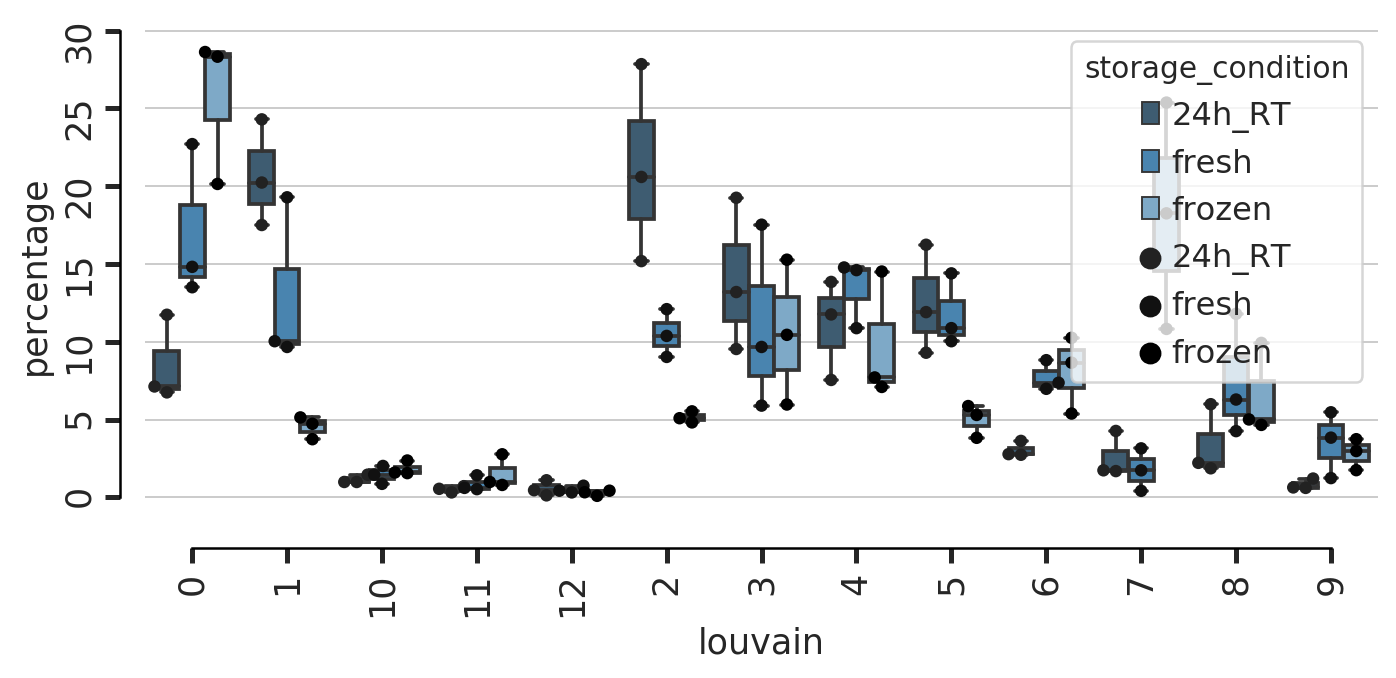

In [40]:
fig = bc.pl.celllabel_quant_boxplot(adata, count_variable = 'louvain', subset_variable = 'donor', condition_identifier = 'storage_condition',  plot_percentage = True);

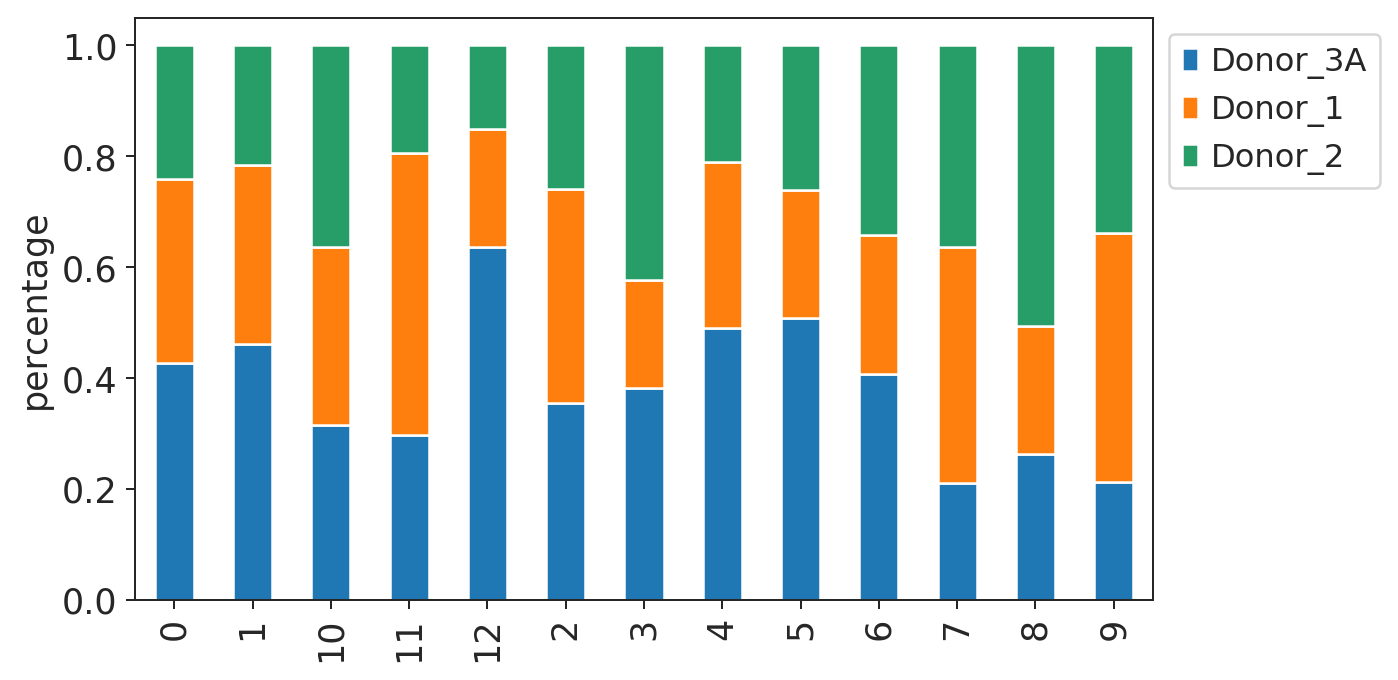

In [41]:
fig = bc.pl.celllabel_quant_stackedbar(adata, count_variable = 'louvain', subset_variable = 'donor');

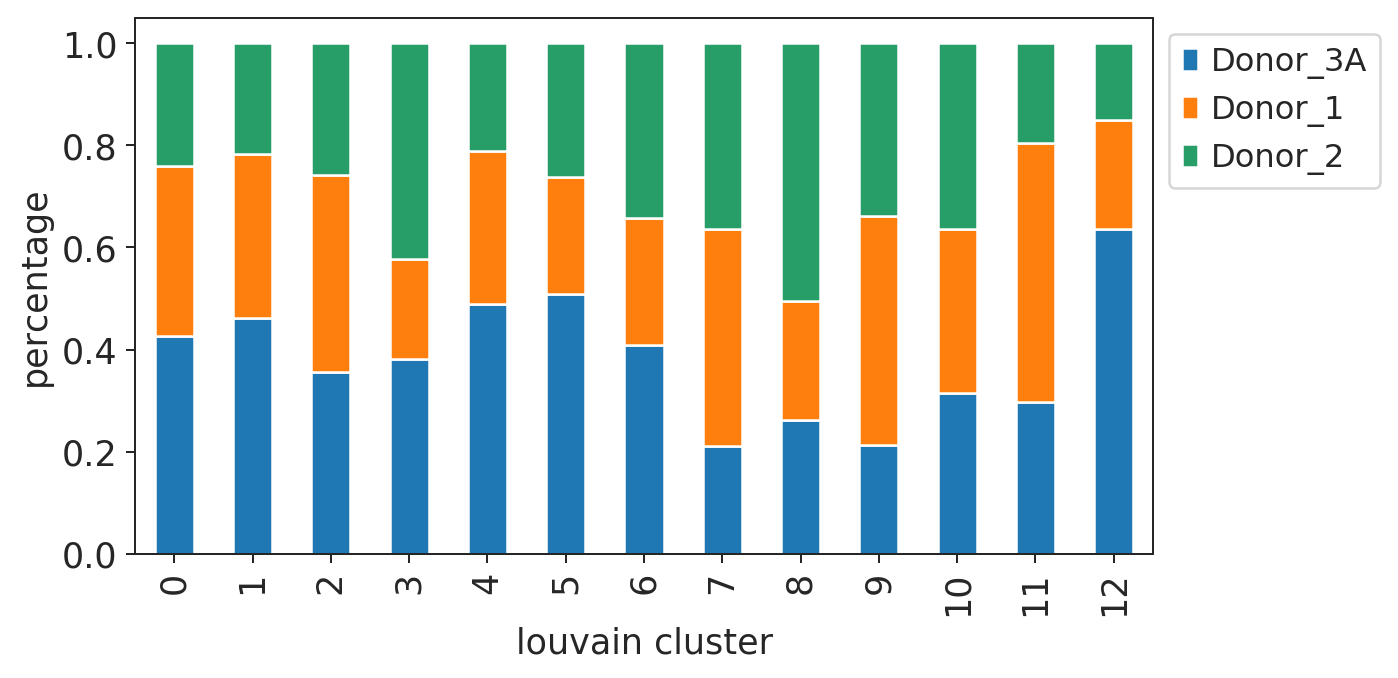

In [42]:
fig = bc.pl.louvain_quant_stackedbar(adata, subset_variable = 'donor')

# Testing with PBMC3k Dataset

In [43]:
adata = bc.datasets.pbmc3k_raw()

In [44]:
#define thresholds
min_genes = 600
min_cells = 2
min_UMI = 600
max_UMI = 6500
max_mito = 0.05
max_genes = 1900

#define outdir
outdir = '../besca_test/pbmc3k/'

#set randomseed
random_seed = 0

adding percent mitochondrial genes to dataframe for species human


/pstore/home/julienla/Code/Besca/besca/besca/pl/_filter_threshold_plots.py:390: RuntimeWarning:

invalid value encountered in true_divide



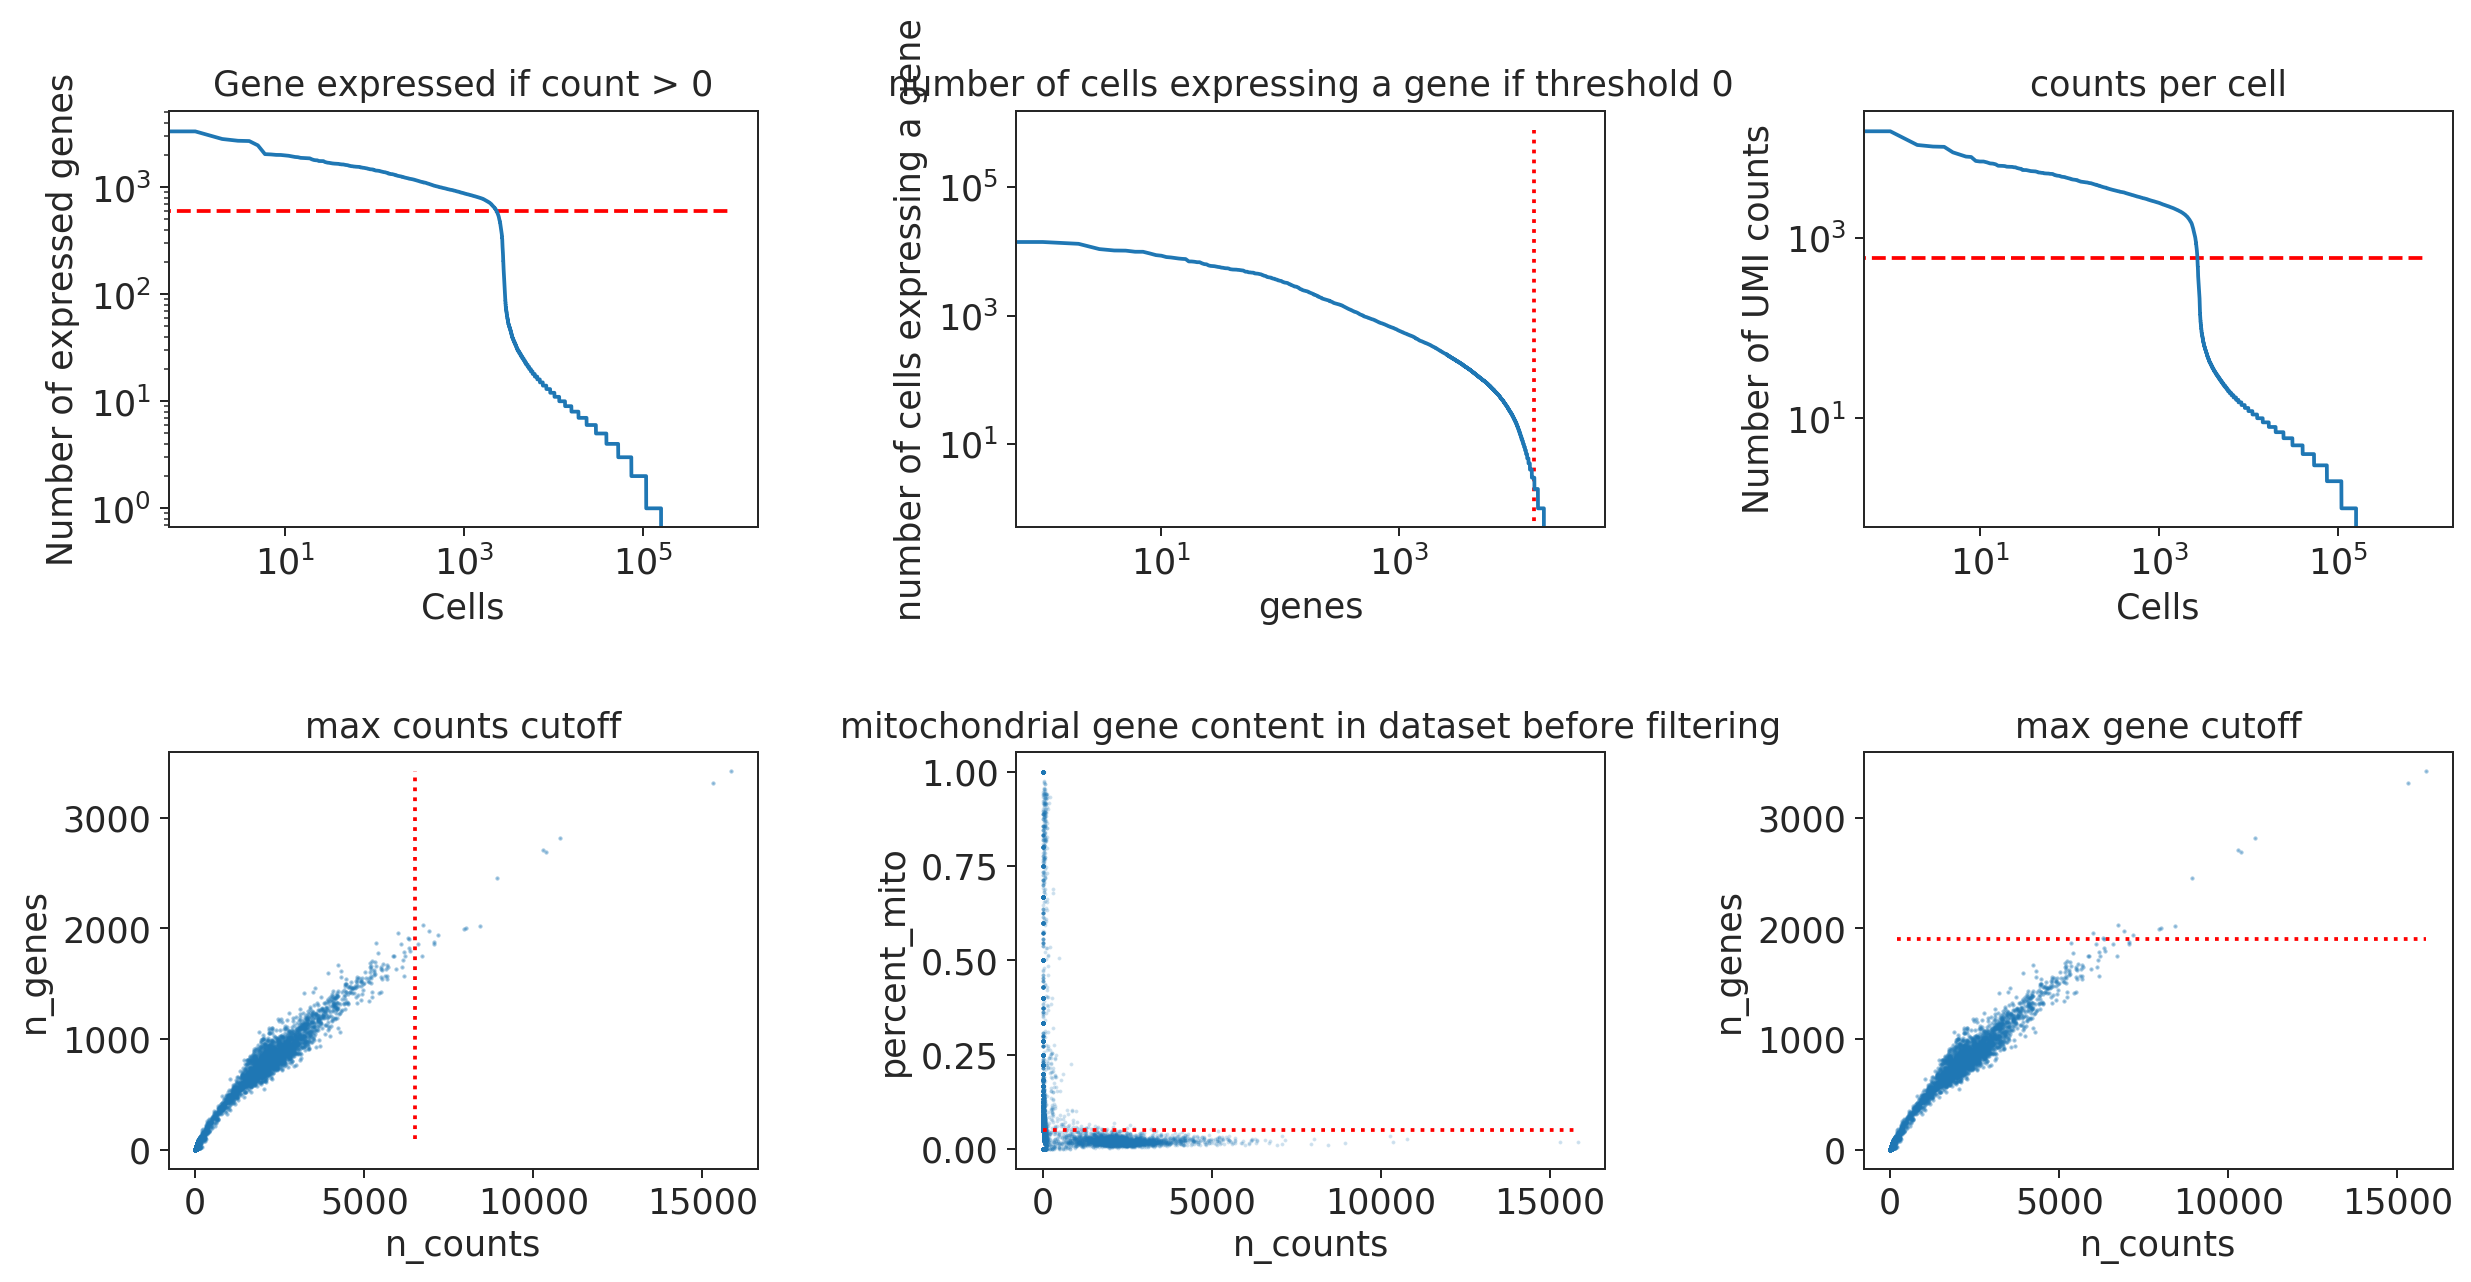

In [45]:
#visualize filtering thresholds
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(ncols=3, nrows=2)
fig.set_figwidth(15)
fig.set_figheight(8)
fig.tight_layout(pad=4.5)

bc.pl.kp_genes(adata, min_genes=min_genes, ax = ax1)
bc.pl.kp_cells(adata, min_cells=min_cells, ax = ax2)
bc.pl.kp_counts(adata, min_counts=min_UMI, ax = ax3)
bc.pl.max_counts(adata, max_counts=max_UMI, ax = ax4)
bc.pl.max_mito(adata, max_mito=max_mito, annotation_type='SYMBOL', species='human', ax = ax5)
bc.pl.max_genes(adata, max_genes=max_genes)

In [46]:
#perform filtering of the thresholds
adata = bc.pp.filter(adata, max_counts=max_UMI, max_genes=max_genes, max_mito=max_mito,min_genes=min_genes, min_counts=min_UMI, min_cells=min_cells)

started with  737280  total cells and  32738  total genes
removed 15 cells that expressed more than 1900 genes
removed 734965 cells that did not express at least 600  genes
removed 4 cells that had more than 6500  counts
removed 0 cells that did not have at least 600 counts
removed 17843 genes that were not expressed in at least 2 cells
removed  17  cells that expressed  5.0 percent mitochondrial genes or more
finished with 2279  total cells and 14895 total genes


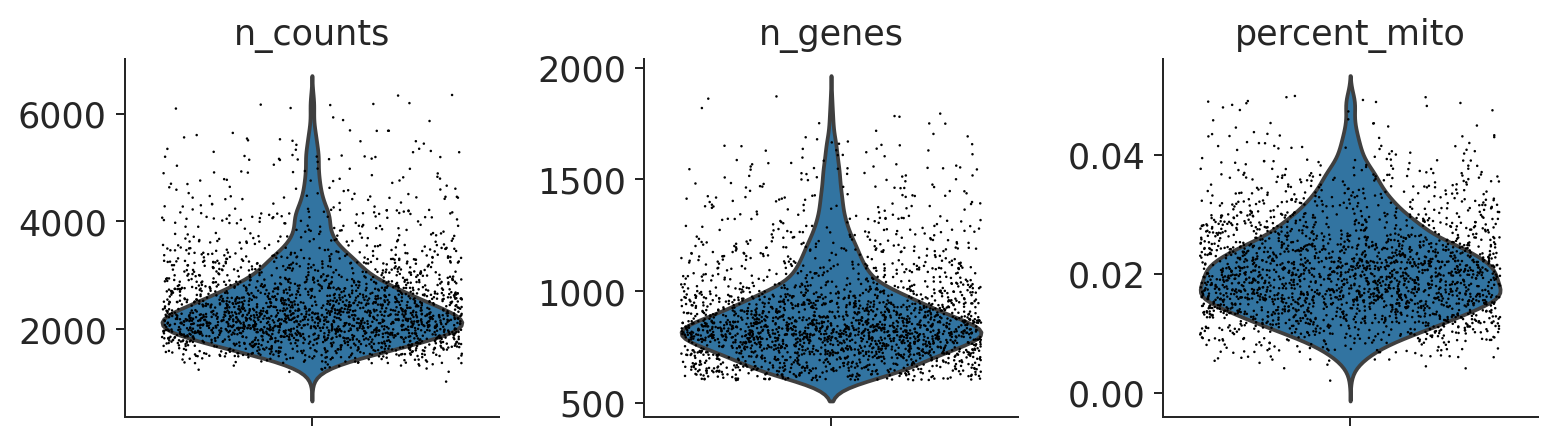

In [47]:
sc.pl.violin(adata, ['n_counts', 'n_genes', 'percent_mito'], multi_panel=True, jitter = 0.4)

In [48]:
#normalize our data (not an internal besca function)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4) 

#log transform normalized UMI-counts (+1 offset) and store as new "raw" data
adata.raw = sc.pp.log1p(adata, copy=True)

In [49]:
#export our data
bc.export.X_to_mtx(adata=adata, outpath=os.path.join(outdir, 'analyzed', 'ANALYSIS_NAME','normalized_counts', 'cp10k'), write_metadata=True, geneannotation='SYMBOL', additional_geneannotation='ENSEMBL')

writing out matrix.mtx ...
adata.X successfully written to matrix.mtx
genes successfully written out to genes.tsv
cellbarcodes successfully written out to barcodes.tsv
annotation successfully written out to metadata.tsv


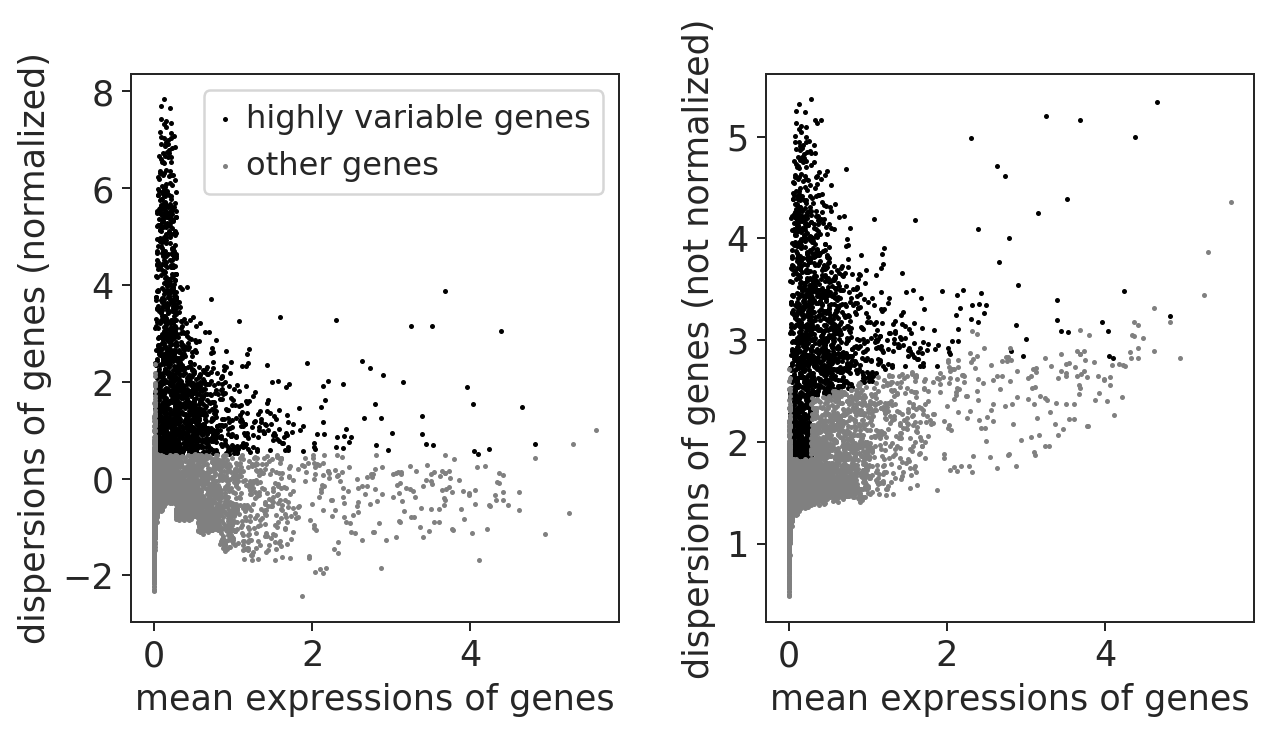

number of variable genes selected  1724


/pstore/home/julienla/.conda/envs/besca_dev/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:285: UserWarning:

Revieved a view of an AnnData. Making a copy.



In [50]:
#identify genes with variable expression
filter_result = sc.pp.filter_genes_dispersion(adata.X, min_mean = 0.0125, max_mean=5, min_disp = 0.5) 
sc.pl.filter_genes_dispersion(filter_result)
nbr_variable_genes = sum(filter_result.gene_subset)
print('number of variable genes selected ', nbr_variable_genes )

#apply filter on data
adata = adata[:, filter_result.gene_subset]

#log transform our data
sc.pp.log1p(adata)

#regress-out
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

#scale data
sc.pp.scale(adata, max_value=10)

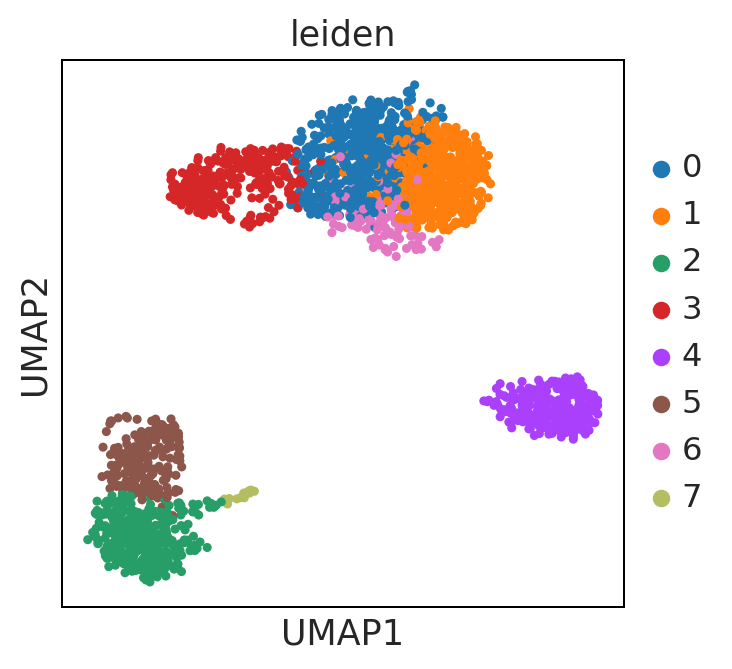

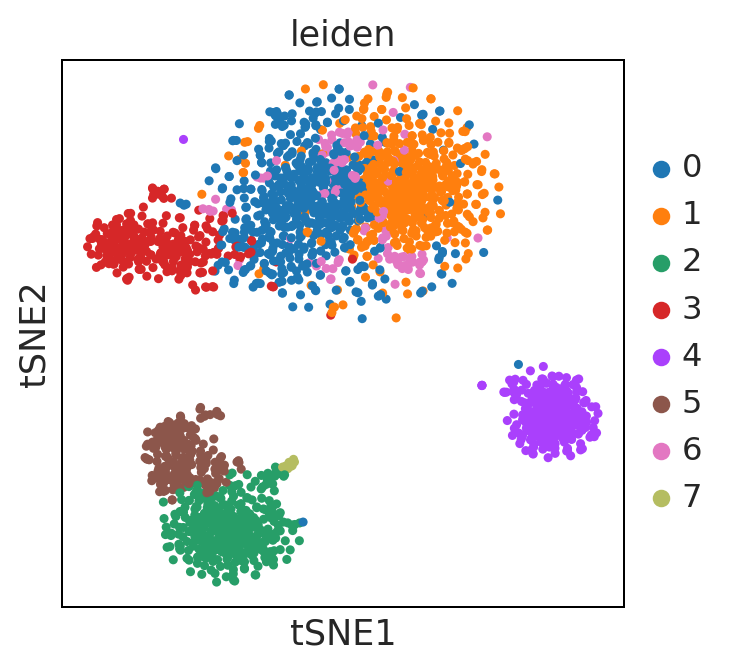

In [51]:
sc.tl.pca(adata, random_state=random_seed, svd_solver='arpack')

sc.pp.neighbors(adata, n_neighbors=10, random_state = random_seed)

sc.tl.umap(adata, random_state = random_seed)

sc.tl.leiden(adata, random_state = random_seed)

#plot clusters
sc.settings.set_figure_params(dpi=90)
sc.pl.umap(adata, color=['leiden'], projection='2d', edgecolor = 'none')

#also perform TSNE
sc.tl.tsne(adata)
sc.pl.tsne(adata, color = ['leiden'])

In [52]:
#write out regressed counts
bc.export.X_to_mtx(adata, outpath=os.path.join(outdir, 'analyzed', 'ANALYSIS_NAME', 'normalized_counts', 'regressedOut'), geneannotation='SYMBOL', write_metadata= True, additional_geneannotation='ENSEMBL')

writing out matrix.mtx ...
adata.X successfully written to matrix.mtx
genes successfully written out to genes.tsv
cellbarcodes successfully written out to barcodes.tsv
annotation successfully written out to metadata.tsv


In [53]:
#export values saved in .raw
#this is an example of how to use this function, in this case we don't need it 
#bc.export.raw_to_mtx(adata, outpath=os.path.join(outdir, 'analyzed', 'ANALYSIS_NAME', 'normalized_counts', 'regressedOut_raw'), geneannotation='SYMBOL', write_metadata= True, additional_geneannotation='ENSEMBL')

In [54]:
bc.export.clustering(adata, outpath = os.path.join(outdir,'analyzed', 'ANALYSIS_NAME', 'labelings', 'louvain'))
bc.export.labeling_info(outpath=os.path.join(outdir,'analyzed', 'ANALYSIS_NAME', 'labelings', 'louvain'))

mapping of cells to  leiden exported successfully to cell2labels.tsv
average.gct exported successfully to file
fract_pos.gct exported successfully to file
labelinfo.tsv successfully written out


In [55]:
bc.export.analysis_metadata(adata, outpath=os.path.join(outdir,'analyzed', 'ANALYSIS_NAME'), n_pcs= 3, umap=True, tsne=True)

results successfully written out to 'analysis_metadata.tsv'


In [56]:
#marker gene analysis
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw = True, n_genes = adata.raw.X.shape[1])

In [57]:
#export rank files
bc.export.ranked_genes(adata=adata, outpath=os.path.join(outdir,'analyzed', 'ANALYSIS_NAME', 'labelings', 'louvain'), type='wilcox')

../besca_test/pbmc3k/analyzed/ANALYSIS_NAME/labelings/louvain/WilxRank.gct written out
../besca_test/pbmc3k/analyzed/ANALYSIS_NAME/labelings/louvain/WilxRank.pvalues.gct written out
../besca_test/pbmc3k/analyzed/ANALYSIS_NAME/labelings/louvain/WilxRank.logFC.gct written out


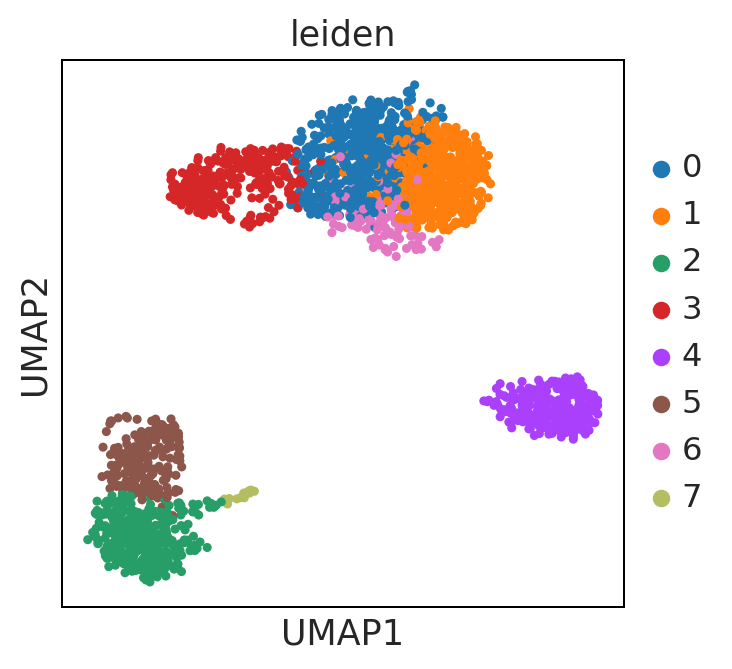

In [58]:
#plot markers documented in Seurat tutorial to label celltypes
sc.pl.umap(adata=adata, color = ['leiden'], edgecolor = 'none')

In [59]:
new_labels = ["mixed", #0
              "mixed", #1
              "CD14+ monocyte", #2
              "mixed", #3
              "B-cell", #4
              "FCGR3A+ monocyte", #5
              "mixed", #6
              "pDC"] #7

bc.tl.annotate_cells_clustering(adata, new_labels, clustering_label = 'leiden')

In [60]:
#preserve these less well defined labels for some plotting examples later on
adata.obs['highlevel_celltype'] = adata.obs.get('celltype').tolist()

In [61]:

#bc.tl.sig.combined_signature_score(adata=adata, GMT_file= '../besca/datasets/genesets/Immune.gmt', use_raw=True, verbose = False)

In [62]:
#sc.pl.umap(adata, color= [col for col in adata.obs.columns if 'Bcell'  in col],
#      color_map='viridis', projection='2d'
#            )

# Demonstrate additional BESCA features

## reclustering and exporting new celltype annotations:

you can choose clusters you wish to subcluster, here in the example 0, 1, 3, 6 since they can't easily be held appart

In [63]:
adata_subset = bc.tl.rc.recluster(adata, celltype=('0', '1', '3', '6'), celltype_label = 'leiden',
                                  resolution = 1.3, method='leiden')

In total 1473 highly variable genes selected within cluster


... storing 'celltype' as categorical
... storing 'highlevel_celltype' as categorical


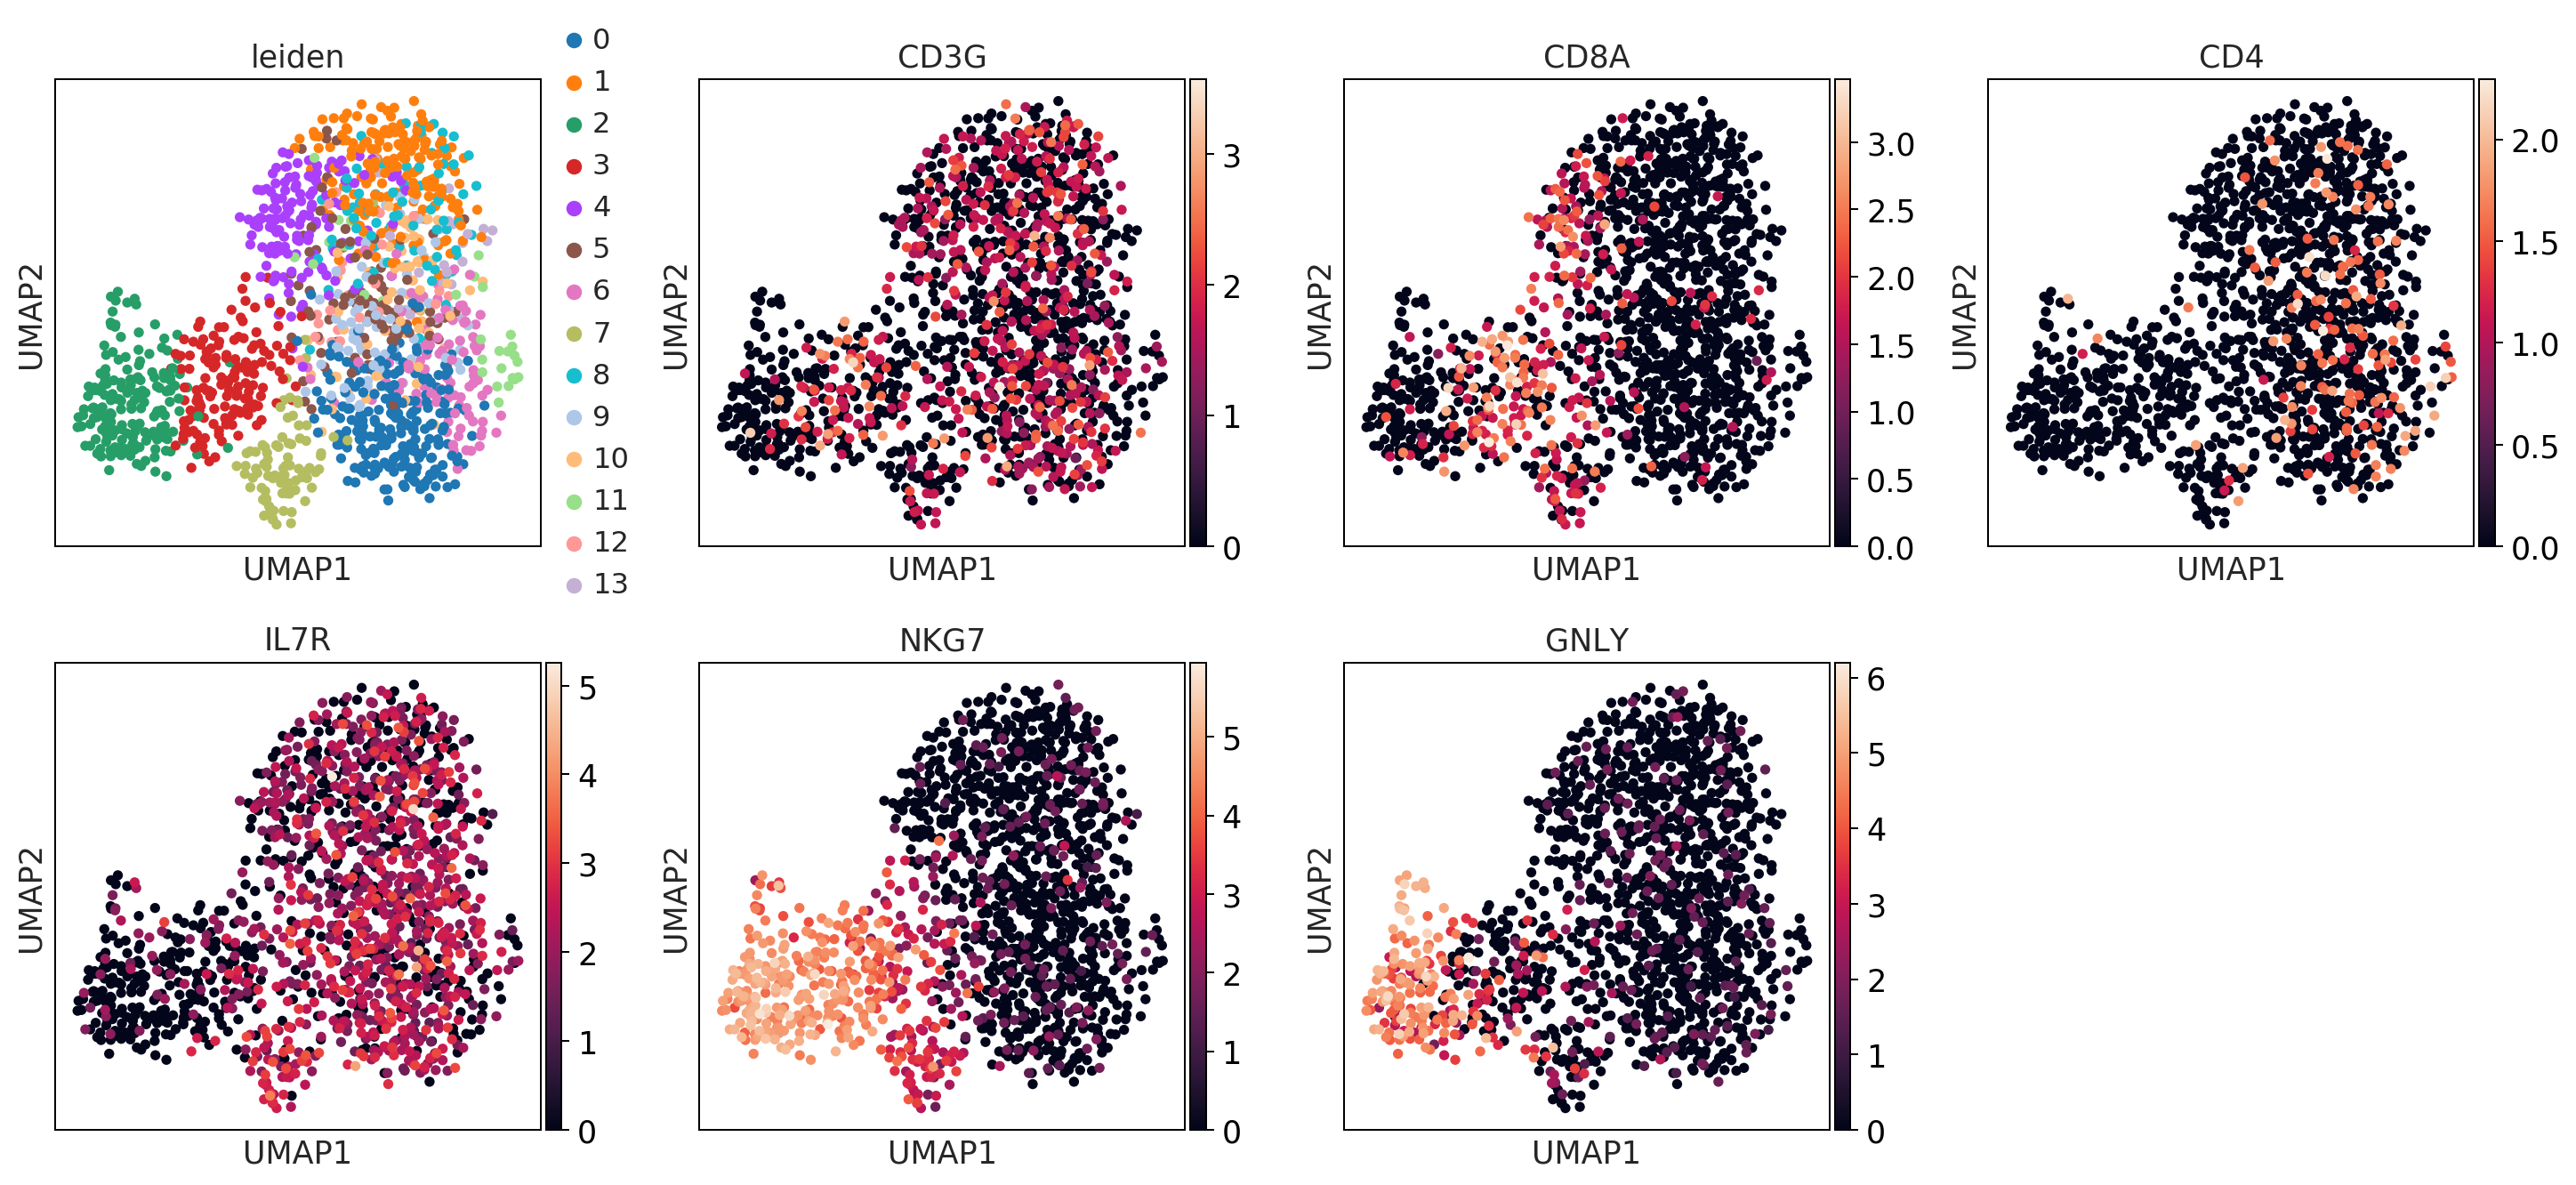

In [64]:
sc.pl.umap(adata_subset, color = ['leiden', 'CD3G', 'CD8A', 'CD4', 'IL7R', 'NKG7', 'GNLY'])

In [65]:
adata.obs.head()

CELL     CONDITION    experiment   donor  \
index                                                                    
AAACATACAACCAC-1  AAACATACAACCAC-1  healthy PBMC  pbmc3k_besca  donor1   
AAACATTGAGCTAC-1  AAACATTGAGCTAC-1  healthy PBMC  pbmc3k_besca  donor1   
AAACATTGATCAGC-1  AAACATTGATCAGC-1  healthy PBMC  pbmc3k_besca  donor1   
AAACCGTGCTTCCG-1  AAACCGTGCTTCCG-1  healthy PBMC  pbmc3k_besca  donor1   
AAACGCACTGGTAC-1  AAACGCACTGGTAC-1  healthy PBMC  pbmc3k_besca  donor1   

                  n_counts  n_genes  percent_mito leiden          celltype  \
index                                                                        
AAACATACAACCAC-1    2421.0      781      0.030153      0             mixed   
AAACATTGAGCTAC-1    4903.0     1352      0.037936      4            B-cell   
AAACATTGATCAGC-1    3148.0     1131      0.008892      0             mixed   
AAACCGTGCTTCCG-1    2639.0      960      0.017431      5  FCGR3A+ monocyte   
AAACGCACTGGTAC-1    2163.0      782      0.016636      1             mixed   

                 highlevel_celltype  
index                                
AAACATACAACCAC-1              mixed  
AAACATTGAGCTAC-1             B-cell  
AAACATTGATCAGC-1              mixed  
AAACCGTGCTTCCG-1   FCGR3A+ monocyte  
AAACGCACTGGTAC-1              mixed

In [68]:
new_labels = ["CD4 T-cell", #0
              "CD4 T-cell", #1
              "NK cell", #2
              "CD8 T-cell", #3
              "CD8 T-cell", #4
              "CD8 T-cell", #5
              "CD4 T-cell",#6
              "CD8 T-cell", #7
              "CD4 T-cell", #8
              "CD4 T-cell", #9
              "CD4 T-cell", #10
              "CD4 T-cell",#11
              "CD4 T-cell",#12
              "CD4 T-cell" #13
             ]

bc.tl.rc.annotate_new_cellnames(adata, adata_subset, names=new_labels, method='leiden')

NOTE: overwriting labels for the selected cells saved in adata.obs.celltype with the new labels


In [69]:
adata.obs.head()

CELL     CONDITION    experiment   donor  \
index                                                                    
AAACATACAACCAC-1  AAACATACAACCAC-1  healthy PBMC  pbmc3k_besca  donor1   
AAACATTGAGCTAC-1  AAACATTGAGCTAC-1  healthy PBMC  pbmc3k_besca  donor1   
AAACATTGATCAGC-1  AAACATTGATCAGC-1  healthy PBMC  pbmc3k_besca  donor1   
AAACCGTGCTTCCG-1  AAACCGTGCTTCCG-1  healthy PBMC  pbmc3k_besca  donor1   
AAACGCACTGGTAC-1  AAACGCACTGGTAC-1  healthy PBMC  pbmc3k_besca  donor1   

                  n_counts  n_genes  percent_mito leiden          celltype  \
index                                                                        
AAACATACAACCAC-1    2421.0      781      0.030153      0        CD8 T-cell   
AAACATTGAGCTAC-1    4903.0     1352      0.037936      4            B-cell   
AAACATTGATCAGC-1    3148.0     1131      0.008892      0        CD4 T-cell   
AAACCGTGCTTCCG-1    2639.0      960      0.017431      5  FCGR3A+ monocyte   
AAACGCACTGGTAC-1    2163.0      782      0.016636      1        CD8 T-cell   

                 highlevel_celltype  
index                                
AAACATACAACCAC-1              mixed  
AAACATTGAGCTAC-1             B-cell  
AAACATTGATCAGC-1              mixed  
AAACCGTGCTTCCG-1   FCGR3A+ monocyte  
AAACGCACTGGTAC-1              mixed

In [70]:
adata.obs.celltype.value_counts()

CD4 T-cell          805
CD8 T-cell          472
CD14+ monocyte      358
B-cell              259
FCGR3A+ monocyte    195
NK cell             176
pDC                  14
Name: celltype, dtype: int64

In [71]:
#export celltypes
bc.export.labeling(adata=adata, outpath = os.path.join(outdir,'analyzed', 'ANALYSIS_NAME', 'labelings', 'celltype'), column='celltype')
bc.export.labeling_info(outpath = os.path.join(outdir,'analyzed', 'ANALYSIS_NAME', 'labelings', 'celltype'), method='manual celltype annotation based on marker expression', annotated_version_of='louvain', expert=True,default=False, public=False, reference=True, description='manual celltype annotation based on the expression of marker genes')

mapping of cells to  celltype exported successfully to cell2labels.tsv
average.gct exported successfully to file
fract_pos.gct exported successfully to file
labelinfo.tsv successfully written out


## Adding an already done labeling into your adata object

In [72]:
#note many of the entries in celltype will be named not labeled since they were filtered out before the proper labeling was performed
adata = bc.datasets.pbmc3k_raw()
adata.obs.head()

CELL     CONDITION    experiment   donor
index                                                                 
AAACATACAAAACG-1  AAACATACAAAACG-1  healthy PBMC  pbmc3k_besca  donor1
AAACATACAAAAGC-1  AAACATACAAAAGC-1  healthy PBMC  pbmc3k_besca  donor1
AAACATACAAACAG-1  AAACATACAAACAG-1  healthy PBMC  pbmc3k_besca  donor1
AAACATACAAACGA-1  AAACATACAAACGA-1  healthy PBMC  pbmc3k_besca  donor1
AAACATACAAAGCA-1  AAACATACAAAGCA-1  healthy PBMC  pbmc3k_besca  donor1

In [73]:
bc.Import.add_cell_labeling(adata, os.path.join(outdir,'analyzed', 'ANALYSIS_NAME', 'labelings', 'celltype'), label='celltype')

In [74]:
adata.obs.head()

CELL     CONDITION    experiment   donor  \
index                                                                    
AAACATACAAAACG-1  AAACATACAAAACG-1  healthy PBMC  pbmc3k_besca  donor1   
AAACATACAAAAGC-1  AAACATACAAAAGC-1  healthy PBMC  pbmc3k_besca  donor1   
AAACATACAAACAG-1  AAACATACAAACAG-1  healthy PBMC  pbmc3k_besca  donor1   
AAACATACAAACGA-1  AAACATACAAACGA-1  healthy PBMC  pbmc3k_besca  donor1   
AAACATACAAAGCA-1  AAACATACAAAGCA-1  healthy PBMC  pbmc3k_besca  donor1   

                     celltype  
index                          
AAACATACAAAACG-1  not labeled  
AAACATACAAAAGC-1  not labeled  
AAACATACAAACAG-1  not labeled  
AAACATACAAACGA-1  not labeled  
AAACATACAAAGCA-1  not labeled

# Testing with PMBC raw dataset

In [75]:
adata = bc.datasets.pbmc_storage_raw()

In [76]:
#define thresholds
min_genes = 600
min_cells = 2
min_UMI = 1600
max_UMI = 15000
max_mito = 0.15
max_genes = 3000

#define outdir
outdir = '../besca_test/pbmc_storage/'
#set randomseed
random_seed = 0

adding percent mitochondrial genes to dataframe for species human


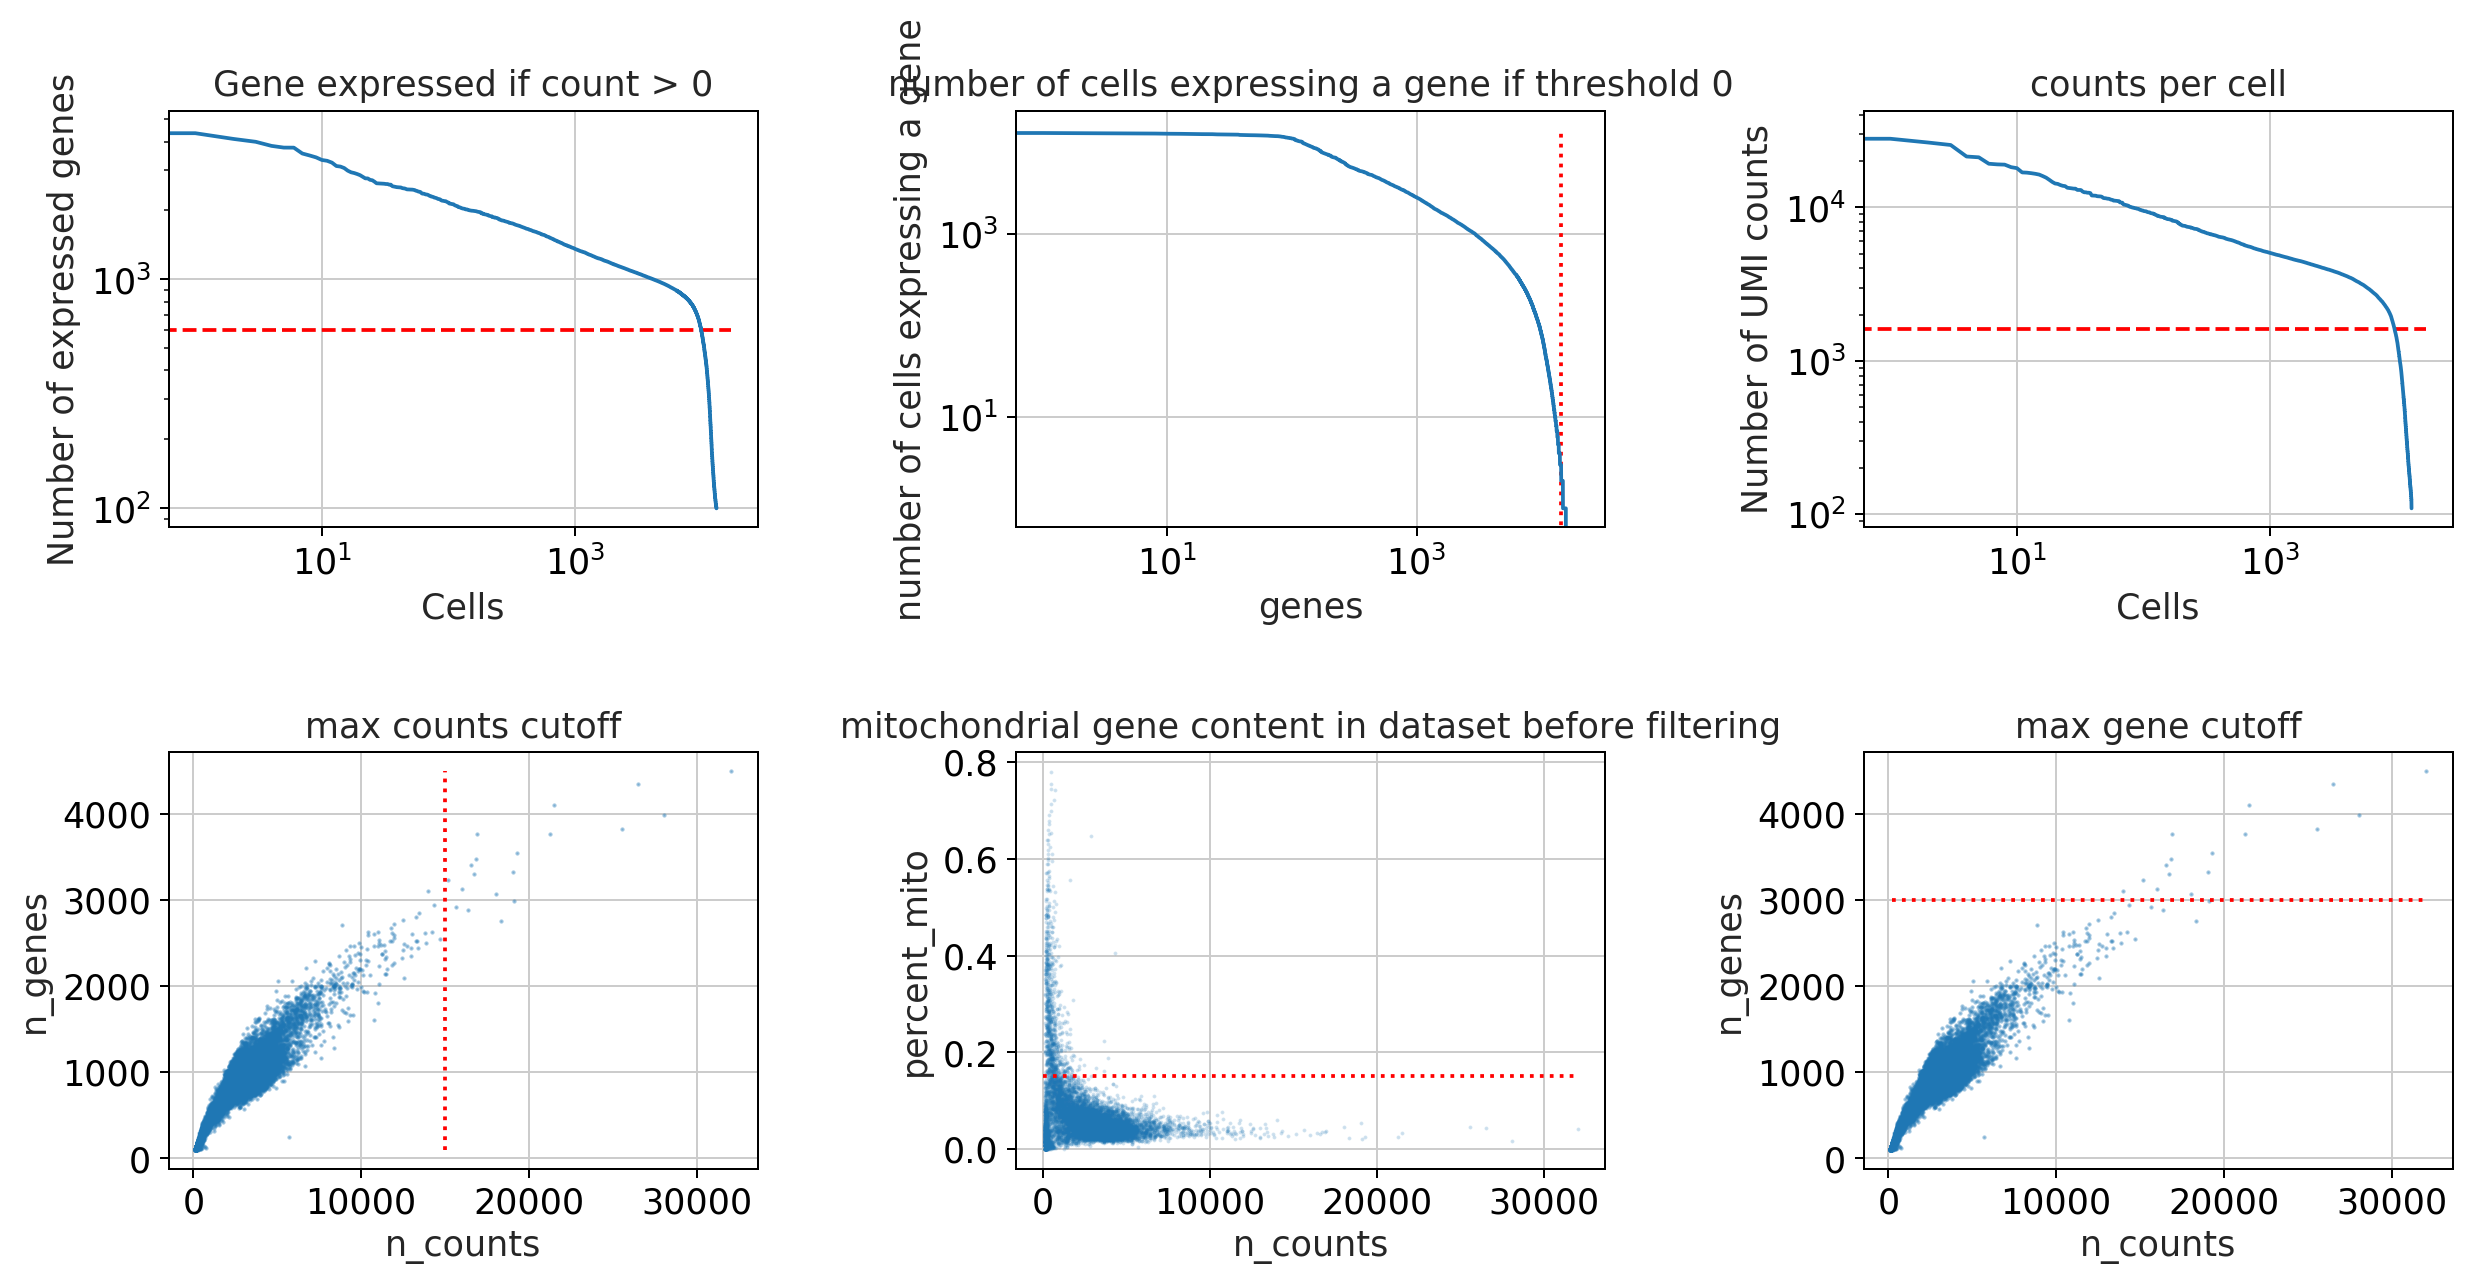

In [77]:
#visualize filtering thresholds
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(ncols=3, nrows=2)
fig.set_figwidth(15)
fig.set_figheight(8)
fig.tight_layout(pad=4.5)

bc.pl.kp_genes(adata, min_genes=min_genes, ax = ax1)
bc.pl.kp_cells(adata, min_cells=min_cells, ax = ax2)
bc.pl.kp_counts(adata, min_counts=min_UMI, ax = ax3)
bc.pl.max_counts(adata, max_counts=max_UMI, ax = ax4)
bc.pl.max_mito(adata, max_mito=max_mito, annotation_type='SYMBOL', species='human', ax = ax5)
bc.pl.max_genes(adata, max_genes=max_genes)

In [78]:
#perform filtering of the thresholds
adata = bc.pp.filter(adata, max_counts=max_UMI, max_genes=max_genes, max_mito=max_mito,min_genes=min_genes, min_counts=min_UMI, min_cells=min_cells)

started with  13066  total cells and  19883  total genes
removed 16 cells that expressed more than 3000 genes
removed 3178 cells that did not express at least 600  genes
removed 4 cells that had more than 15000  counts
removed 386 cells that did not have at least 1600 counts
removed 4980 genes that were not expressed in at least 2 cells
removed  29  cells that expressed  15.0 percent mitochondrial genes or more
finished with 9453  total cells and 14903 total genes


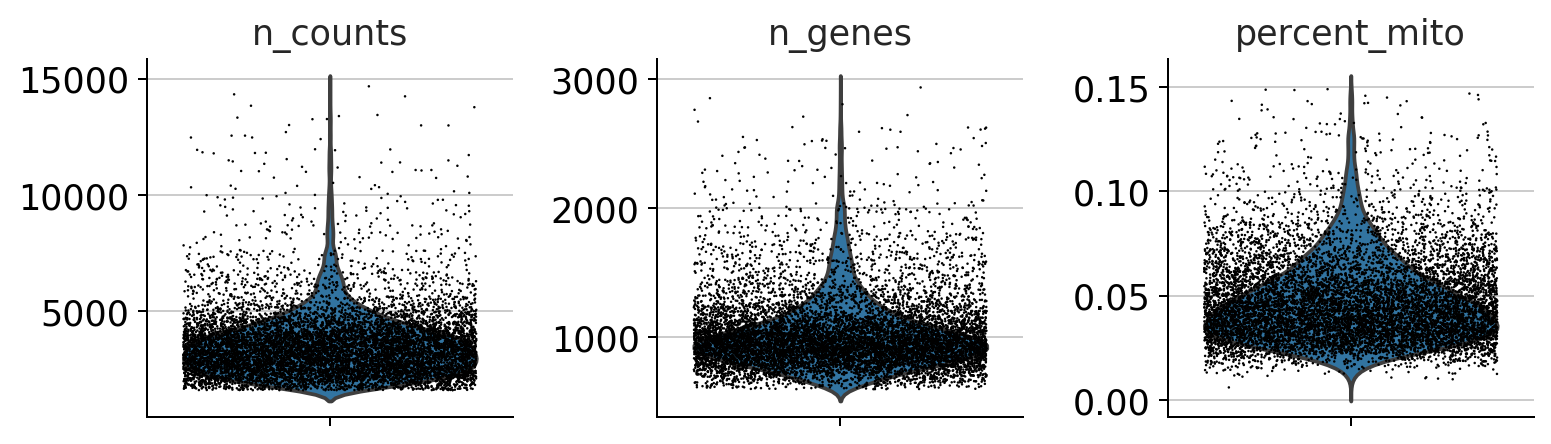

In [79]:
sc.pl.violin(adata, ['n_counts', 'n_genes', 'percent_mito'], multi_panel=True, jitter = 0.4)

In [81]:
#normalize our data (not an internal besca function)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4) 

#log transform normalized UMI-counts (+1 offset) and store as new "raw" data
adata.raw = sc.pp.log1p(adata, copy=True)

In [82]:
#export our data
bc.export.X_to_mtx(adata=adata, outpath=os.path.join(outdir, 'analyzed', 'ANALYSIS_NAME','normalized_counts', 'cp10k'), write_metadata=True, geneannotation='SYMBOL', additional_geneannotation='ENSEMBL')

writing out matrix.mtx ...
adata.X successfully written to matrix.mtx
genes successfully written out to genes.tsv
cellbarcodes successfully written out to barcodes.tsv
annotation successfully written out to metadata.tsv


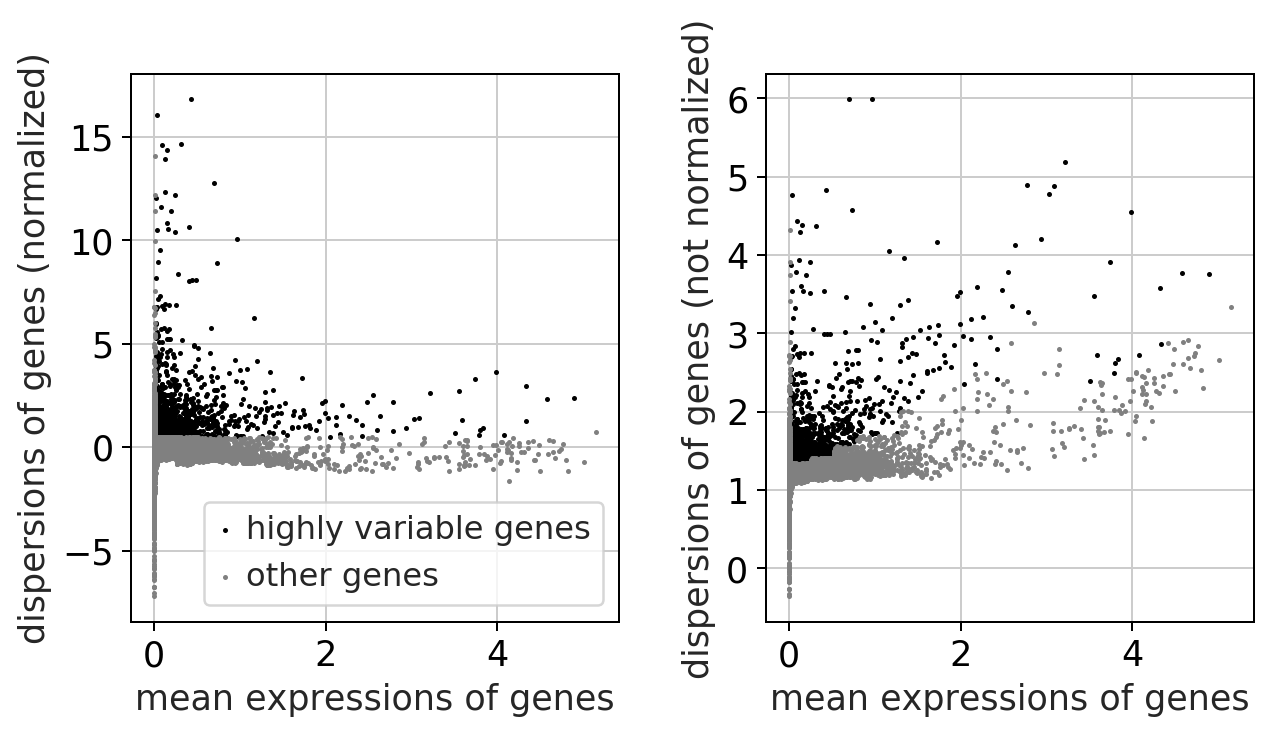

number of variable genes selected  1320


/pstore/home/julienla/.conda/envs/besca_dev/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:285: UserWarning:

Revieved a view of an AnnData. Making a copy.



In [83]:
#identify genes with variable expression
filter_result = sc.pp.filter_genes_dispersion(adata.X, min_mean = 0.0125, max_mean=5, min_disp = 0.5) 
sc.pl.filter_genes_dispersion(filter_result)
nbr_variable_genes = sum(filter_result.gene_subset)
print('number of variable genes selected ', nbr_variable_genes )

#apply filter on data
adata = adata[:, filter_result.gene_subset]

#log transform our data
sc.pp.log1p(adata)

#regress-out
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

#scale data
sc.pp.scale(adata, max_value=10)

/pstore/home/julienla/.conda/envs/besca_dev/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../.local/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^


/pstore/home/julienla/.local/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../.local/lib/python3.7/site-packages/umap/ut

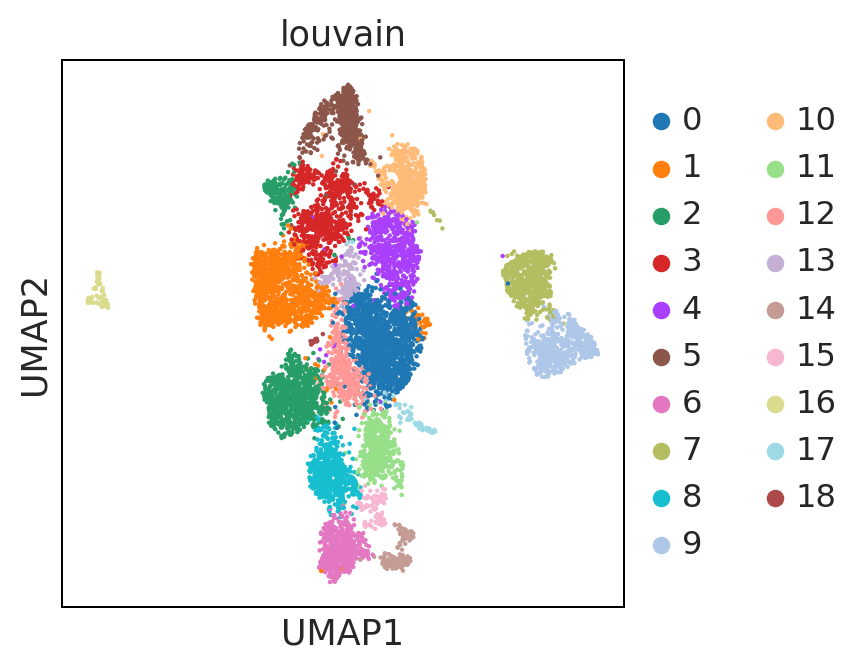

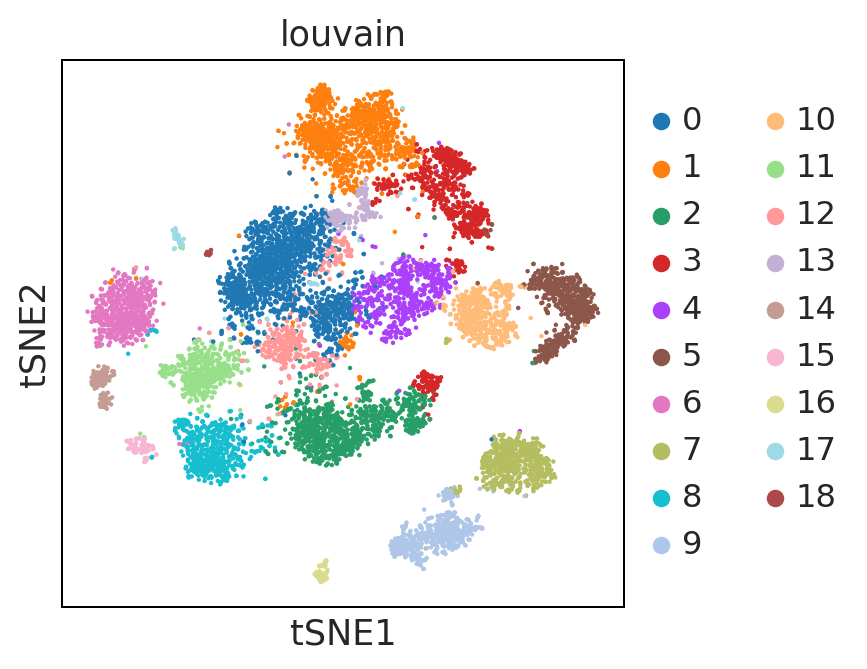

In [84]:
sc.tl.pca(adata, random_state=random_seed, svd_solver='arpack')

sc.pp.neighbors(adata, n_neighbors=10, random_state = random_seed)

sc.tl.umap(adata, random_state = random_seed)

sc.tl.louvain(adata, random_state = random_seed)

#plot clusters
sc.settings.set_figure_params(dpi=90)
sc.pl.umap(adata, color=['louvain'], projection='2d', edgecolor = 'none')

#also perform TSNE
sc.tl.tsne(adata)
sc.pl.tsne(adata, color = ['louvain'])

In [85]:
#write out regressed counts
# THIS IS SLOW
bc.export.X_to_mtx(adata, outpath=os.path.join(outdir, 'analyzed', 'ANALYSIS_NAME', 'normalized_counts', 'regressedOut'), geneannotation='SYMBOL', write_metadata= True, additional_geneannotation='ENSEMBL')

writing out matrix.mtx ...
adata.X successfully written to matrix.mtx
genes successfully written out to genes.tsv
cellbarcodes successfully written out to barcodes.tsv
annotation successfully written out to metadata.tsv


In [86]:
#export values saved in .raw
#this is an example of how to use this function, in this case we don't need it 
#bc.export.raw_to_mtx(adata, outpath=os.path.join(outdir, 'analyzed', 'ANALYSIS_NAME', 'normalized_counts', 'regressedOut_raw'), geneannotation='SYMBOL', write_metadata= True, additional_geneannotation='ENSEMBL')

In [87]:
bc.export.louvain(adata, outpath = os.path.join(outdir,'analyzed', 'ANALYSIS_NAME', 'labelings', 'louvain'))
bc.export.labeling_info(outpath=os.path.join(outdir,'analyzed', 'ANALYSIS_NAME', 'labelings', 'louvain'))

mapping of cells to  louvain exported successfully to cell2labels.tsv
average.gct exported successfully to file
fract_pos.gct exported successfully to file
labelinfo.tsv successfully written out


In [88]:
bc.export.analysis_metadata(adata, outpath=os.path.join(outdir,'analyzed', 'ANALYSIS_NAME'), n_pcs= 3, umap=True, tsne=True)

results successfully written out to 'analysis_metadata.tsv'


In [89]:
#marker gene analysis
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon', use_raw = True, n_genes = adata.raw.X.shape[1])

In [90]:
#export rank files
bc.export.ranked_genes(adata=adata, outpath=os.path.join(outdir,'analyzed', 'ANALYSIS_NAME', 'labelings', 'louvain'), type='wilcox')

../besca_test/pbmc_storage/analyzed/ANALYSIS_NAME/labelings/louvain/WilxRank.gct written out
../besca_test/pbmc_storage/analyzed/ANALYSIS_NAME/labelings/louvain/WilxRank.pvalues.gct written out
../besca_test/pbmc_storage/analyzed/ANALYSIS_NAME/labelings/louvain/WilxRank.logFC.gct written out


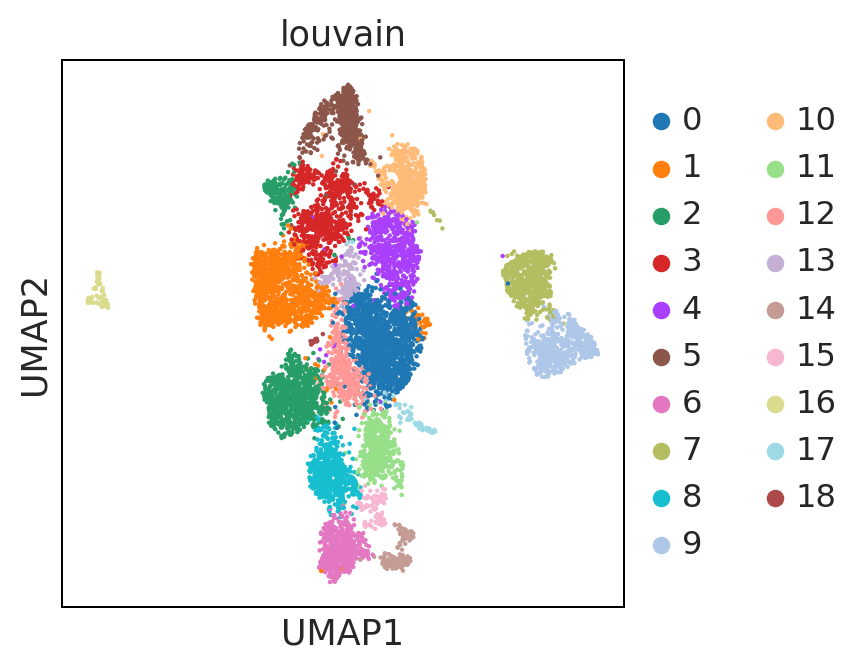

In [91]:
#plot markers documented in Seurat tutorial to label celltypes
sc.pl.umap(adata=adata, color = ['louvain'], edgecolor = 'none')

## Counting occurances of labels and have matching colors with the UMAP.

In [92]:
#generate a count table of the chosen count_variable
counts = bc.tl.count_occurance(adata=adata, count_variable='louvain', add_percentage=True)
display(counts)

Counts  Percentage
0     1493       15.79
1     1100       11.64
2      971       10.27
3      729        7.71
4      588        6.22
5      561        5.93
6      553        5.85
7      545        5.77
8      528        5.59
9      524        5.54
10     478        5.06
11     438        4.63
12     377        3.99
13     166        1.76
14     147        1.56
15      99        1.05
16      76        0.80
17      65        0.69
18      15        0.16

In [101]:
ncolors = ( counts.shape)[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

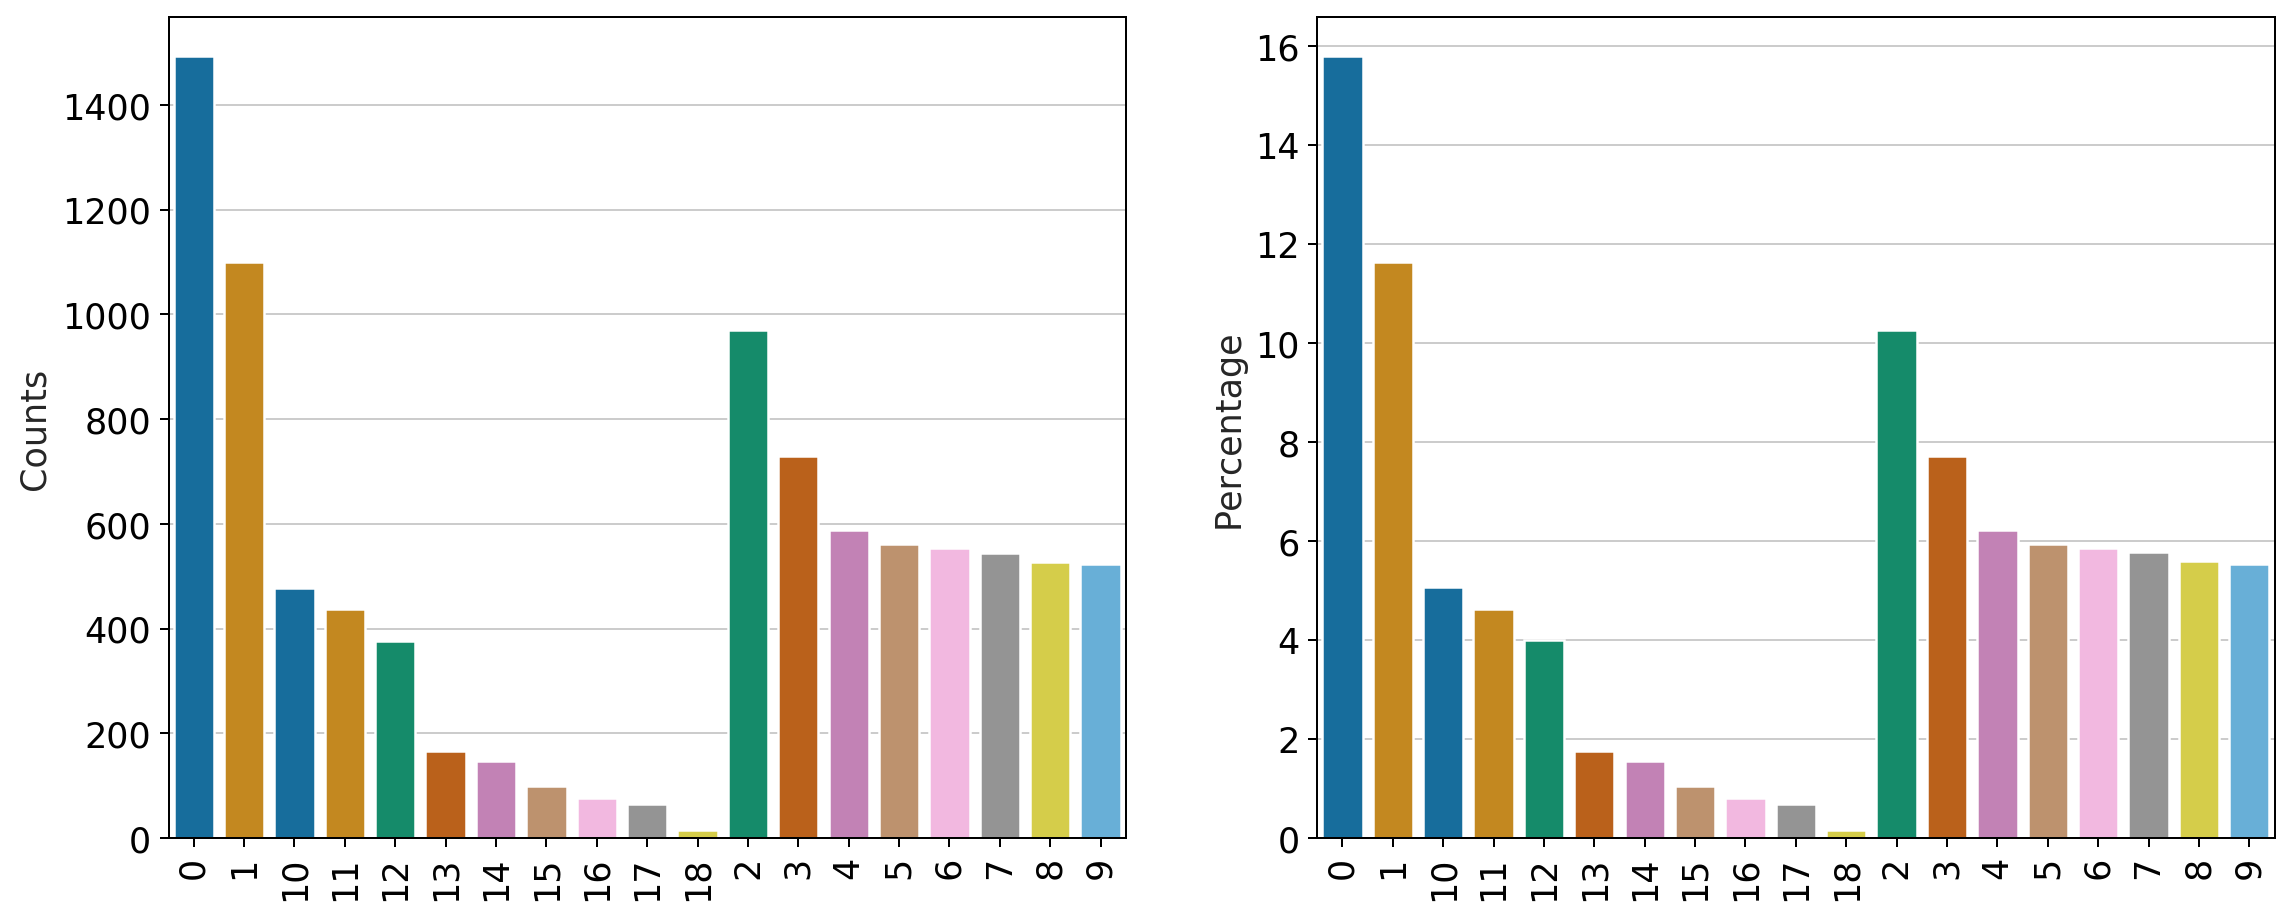

In [104]:
import seaborn as sns
#generate a basic bar plot of the table above with customed palette
current_palette ={str(i): sns.color_palette('colorblind', ncolors)[i] for i in range(ncolors)}
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.barplot(data=counts, x=counts.index.tolist(), y='Counts', palette = current_palette)
plt.xticks(rotation=90)

ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.barplot(data=counts, x=counts.index.tolist(), y='Percentage', palette = current_palette)
plt.xticks(rotation=90)


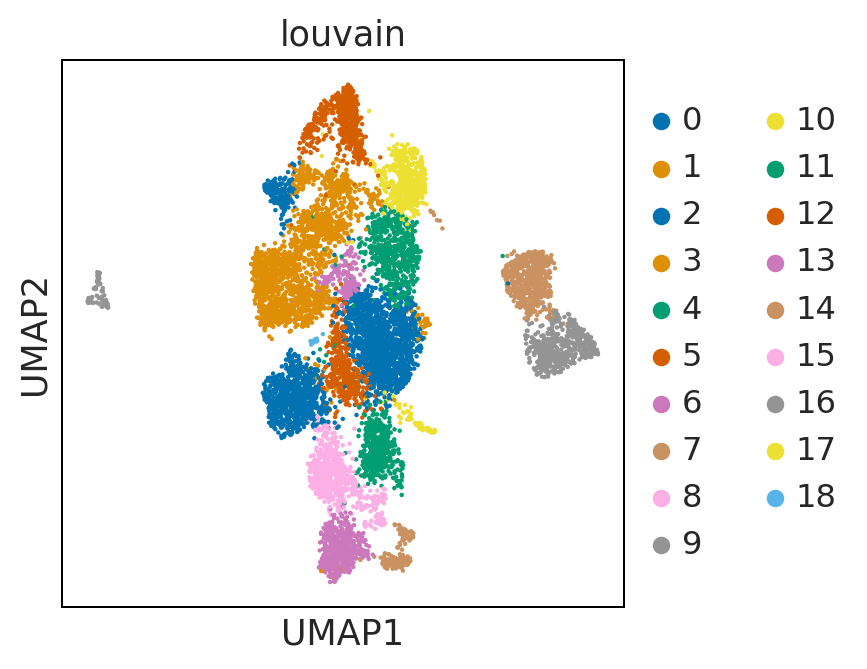

In [105]:
# Matching those with the UMAP colors
bc.pl.update_qualitative_palette( adata, palette=current_palette, group = 'louvain', checkColors=True)
#plot markers documented in Seurat tutorial to label celltypes
sc.pl.umap(adata=adata, color = ['louvain'], edgecolor = 'none')

In [106]:
adata

AnnData object with n_obs × n_vars = 9453 × 1320 
    obs: 'CELL', 'CONDITION', 'experiment', 'sample_type', 'storage_condition', 'donor', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'louvain'
    var: 'ENSEMBL', 'SYMBOL', 'n_cells'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'

In [108]:
adata.obs.storage_condition.value_counts()

24h_RT    4190
fresh     3121
frozen    2142
Name: storage_condition, dtype: int64

In [109]:
# compare counts between two 'conditions' and output as a classic dataframe
(DF) = bc.tl.count_occurance_subset_conditions(adata=adata,
                                                                subset_variable= 'storage_condition',
                                                                condition_identifier='storage_condition',
                                                                count_variable='louvain',
                                                                return_percentage=True)
display(DF)

Percentage 24h_RT 24h_RT  Percentage fresh fresh  Percentage frozen frozen
0                      35.25                    0.10                      0.61
1                       1.36                   31.85                      2.29
10                     11.17                    0.22                      0.14
11                     10.36                    0.00                      0.19
12                      8.21                    0.06                      1.45
13                      2.36                    2.11                      0.05
14                      0.02                    3.01                      2.43
15                      0.88                    1.35                      0.93
16                      0.53                    0.74                      1.45
17                      0.81                    0.80                      0.28
18                      0.17                    0.16                      0.14
2                       0.21                    0.00                     44.91
3                       1.34                   17.65                      5.70
4                      13.87                    0.03                      0.28
5                       0.21                   12.18                      8.03
6                       0.02                   16.63                      1.54
7                      12.60                    0.06                      0.70
8                       0.19                    0.03                     24.23
9                       0.43                   13.01                      4.67

In [ ]:
adata.obs.head()

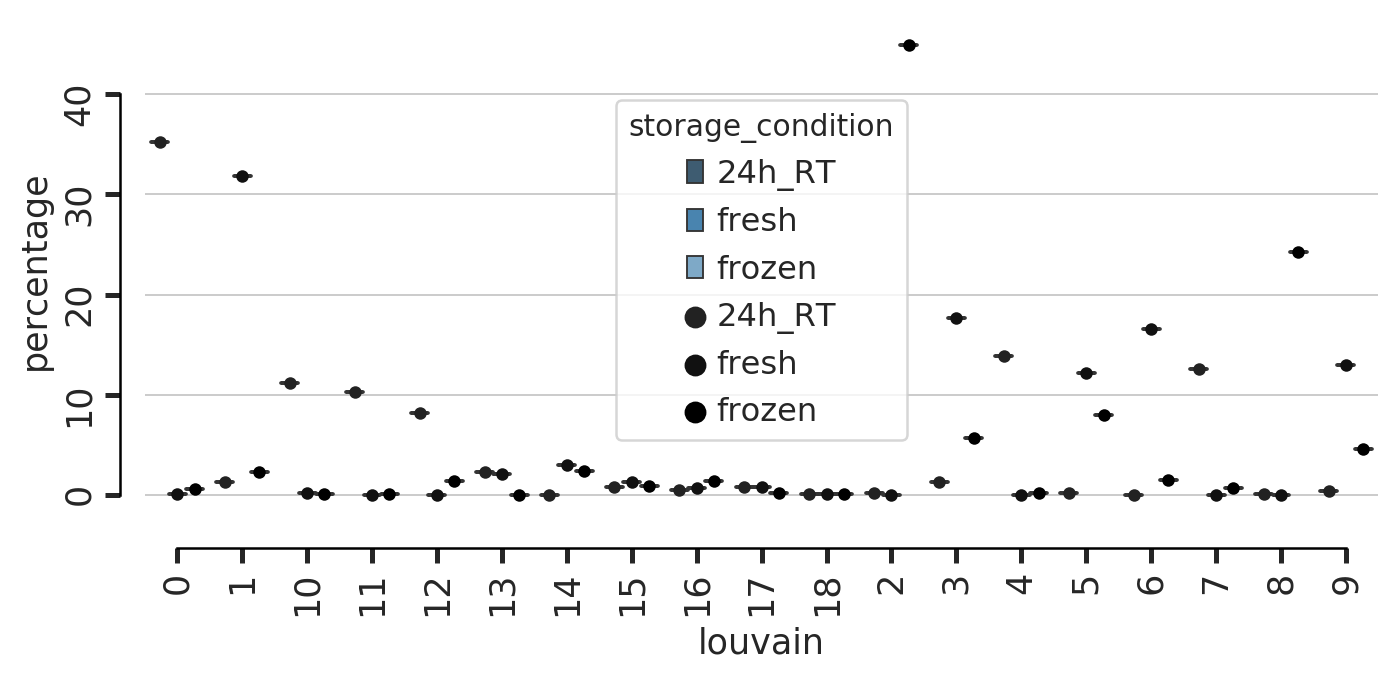

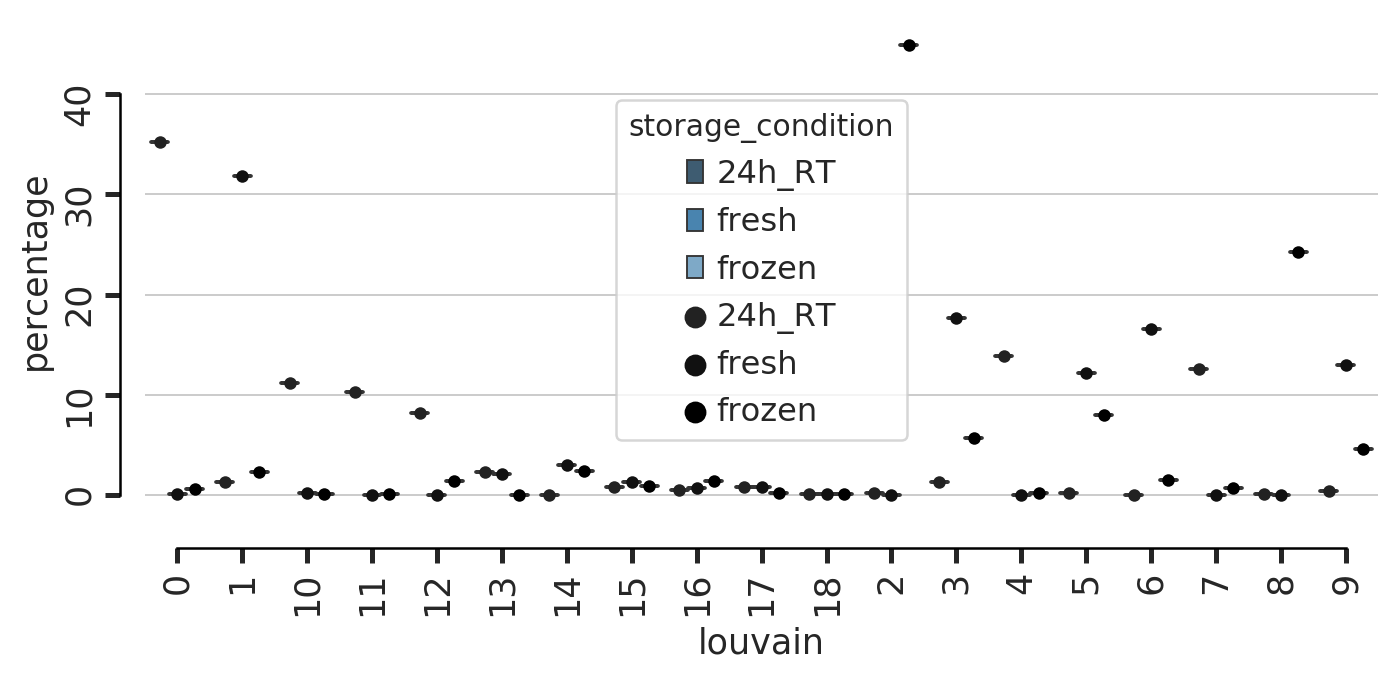

In [110]:
bc.pl.celllabel_quant_boxplot(adata, subset_variable='batch', count_variable = 'louvain', condition_identifier='storage_condition')#, save_fig = False);

# Split gene expression plots

In [112]:
adata = bc.datasets.pbmc_storage_processed()
# Split gene expression plots can only handle two conditions.
adata_subset = adata[ adata.obs['donor'] != 'Donor_1']


/pstore/home/julienla/.conda/envs/besca_dev/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



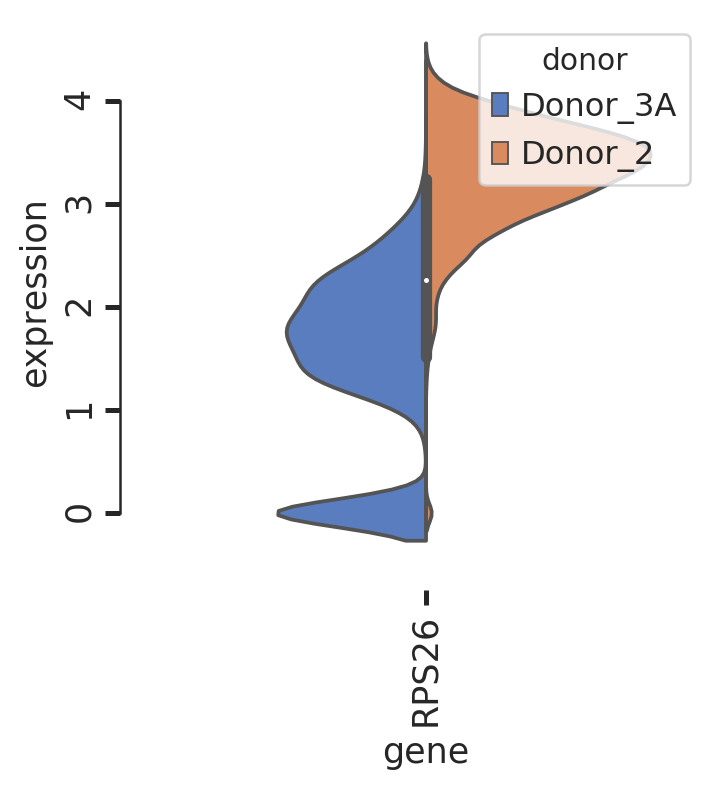

In [113]:
bc.pl.gene_expr_split(adata_subset, genes = ['RPS26'], split_variable= 'donor')

/pstore/home/julienla/.conda/envs/besca_dev/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/pstore/home/julienla/.conda/envs/besca_dev/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



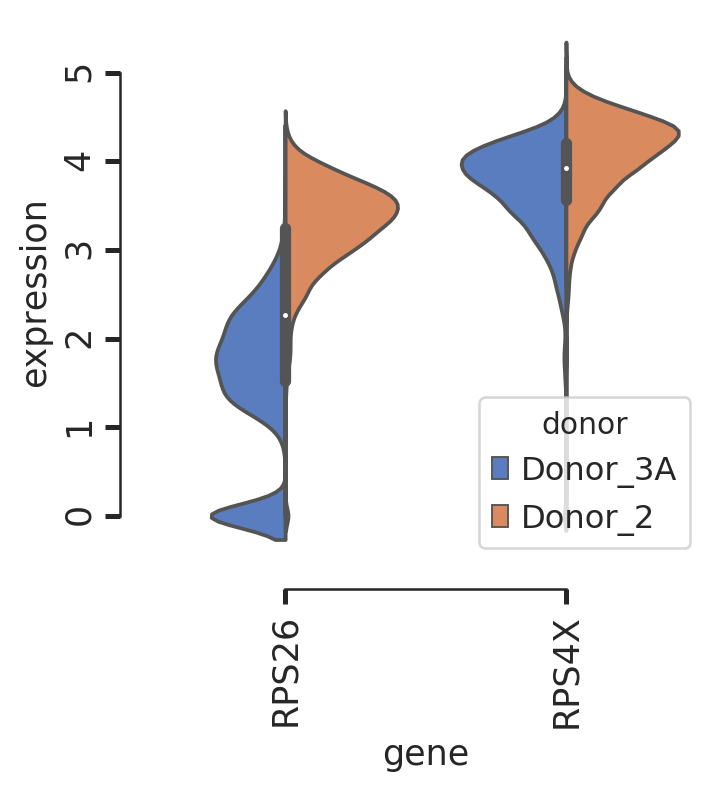

In [114]:
bc.pl.gene_expr_split(adata_subset, genes = ['RPS26', 'RPS4X'], split_variable= 'donor')#, #group_variable = 'condition', 
                      #split_variable='condition')

/pstore/home/julienla/.conda/envs/besca_dev/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/pstore/home/julienla/.conda/envs/besca_dev/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



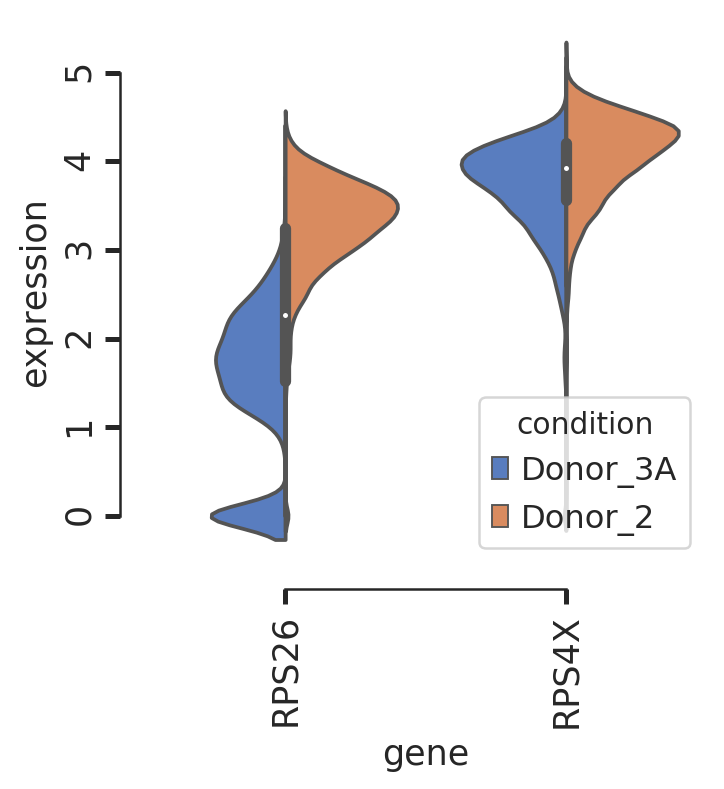

In [115]:
bc.pl.gene_expr_split(adata_subset,
                      genes = ['RPS26', 'RPS4X'], 
                      label_split_variable= 'condition', 
                     split_variable= 'donor')

# Helper function:

## Conversion

From symbol to ensembl and vice-versa.

In [116]:
bc.convert_symbol_to_ensembl( ['KRAS', 'MAP4K1'])

querying 1-2...done.
Finished.


[{'gene': 'ENSG00000133703'},
 [{'gene': 'ENSG00000282928'}, {'gene': 'ENSG00000104814'}]]

In [117]:
bc.convert_ensembl_to_symbol([ 'ENSG00000104814', 'ENSG00000282928' ])

querying 1-2...done.
Finished.


['MAP4K1', 'MAP4K1']